In [1]:
from db_connection import DB_Connection
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import TextBox
import re, json
from wordcloud import WordCloud
import Tweet


db = DB_Connection()

database = db.query('''SELECT * FROM TWTTWEET WHERE TWEET_CREATED<'2021-01-01'
                    ORDER BY TWEET_CREATED DESC;''')
df = pd.DataFrame(database, columns=['id','userid','text','date',
                            'link','media1','media2','media3', 'media4'])
df = df.loc[:, ['id', 'text']]


processed = Tweet.clean_text(df, 'text')
classified = Tweet.classify_text(processed, 'clean')

print('Done.')

Connection succesful.
Done.


In [2]:
import pickle
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(max_features=600, min_df=5, max_df=0.7)
X11 = vectorizer1.fit_transform(classified.clean).toarray()

y = [i for i in classified[['isAccident','isObstacle','isDanger']].values]
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X11, y, test_size=0.2, random_state=0)

In [11]:
with open('moresume1-1', 'rb') as fl:
    moresume1 = pickle.load(fl)

In [8]:
resume1 = pd.DataFrame(moresume1)
resume1.to_csv('resume1.csv')

In [17]:
temp = moresume1[7]
moresume1[7] = moresume1[1]
moresume1

[[2100, 12576.946767091751, 0.9818466799658022],
 [2300, 13857.196723937988, 0.9819321744086634],
 [2500, 15091.859599113464, 0.9817896836705614],
 [3000, 18060.39907836914, 0.9815616984895982],
 [3500, 21058.14136505127, 0.9816756910800798],
 [2200, 14599.626916408539, 0.9817041892277002],
 [2250, 13740.518744468689, 0.9817041892277002],
 [2300, 13857.196723937988, 0.9819321744086634],
 [2350, 15094.654872655869, 0.9819321744086634],
 [2400, 14962.715512037277, 0.9818181818181818]]

In [23]:
res = resume1.drop(index=7,axis=0).sort_values(0)
res.to_csv('resume1-1.csv')

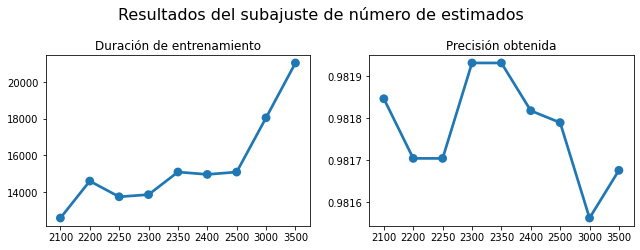

In [27]:
plt.figure(figsize=(9,3.5))
plt.suptitle('Resultados del subajuste de número de estimados', fontsize=16)
plt.subplot(1, 2, 1)
sns.pointplot(x=0, y=1, data=res)
plt.title('Duración de entrenamiento')
# plt.xticks(range(len(xs)), xs)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1, 2, 2)
sns.pointplot(x=0, y=2, data=res)
plt.title('Precisión obtenida')
# plt.xticks(range(len(xs)), xs)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

In [11]:
with open('moarr0', 'rb') as fl:
    moarr0 = pickle.load(fl)